In [108]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn

In [109]:
print(f"Numpy version {np.__version__}")
print(f"pandas version {pd.__version__}")
print(f"sklearn version {sklearn.__version__}")

Numpy version 1.26.2
pandas version 2.1.4
sklearn version 1.4.2


In [66]:
# Load the dataset
df = pd.read_csv("modified_student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,name,email,password,attendance
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,Varsha,varsha@gmail.com,varsha6106,64
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,6,6,7,Varsha,varsha@gmail.com,varsha8052,92
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,6,7,9,Mary,mary@gmail.com,mary8790,53
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,16,15,16,Mary,mary@gmail.com,mary1453,96
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,7,11,11,Khushi,khushi@gmail.com,khushi4126,95


In [67]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,name,email,password,attendance
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,Ansh,ansh@gmail.com,ansh9438,87
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,3,14,16,16,Ram,ram@gmail.com,ram7188,87
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,11,9,8,Ram,ram@gmail.com,ram1477,93
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,Piyush,piyush@gmail.com,piyush9710,61
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,5,5,8,9,9,Karan,karan@gmail.com,karan3025,64


In [68]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'name', 'email',
       'password', 'attendance'],
      dtype='object')

1. school: The student's school (binary):

- "GP" = Gabriel Pereira
- "MS" = Mousinho da Silveira

2. sex: The student's gender (binary):

- "F" = Female
- "M" = Male

3. age: The student's age (numeric).

4. address: The student's home address type (binary):

- "U" = Urban
- "R" = Rural

5. famsize: Family size (binary):

- "LE3" = Less than or equal to 3 members
- "GT3" = Greater than 3 members

6. Pstatus: Parent's cohabitation status (binary):

- "T" = Living together
- "A" = Apart
7. Medu: Mother's education level (numeric):

- 0 = None
- 1 = Primary education (4th grade)
- 2 = 5th to 9th grade
- 3 = Secondary education
- 4 = Higher education

8. Fedu: Father's education level (numeric), same scale as Medu.

9. Mjob: Mother's job (categorical):

- "teacher" = Teacher
- "health" = Health care related
- "services" = Civil services (e.g. administrative or police)
- "at_home" = At home
- "other" = Other

10. Fjob: Father's job (categorical), same categories as Mjob.

11. reason: Reason to choose this school (categorical):

- "home" = Close to home
- "reputation" = School's reputation
- "course" = Preference for the course
- "other" = Other reasons

12. guardian: Student's guardian (categorical):

- "mother" = Mother
- "father" = Father
- "other" = Other

13. traveltime: Home to school travel time (numeric):

- 1 = <15 minutes
- 2 = 15 to 30 minutes
- 3 = 30 minutes to 1 hour
- 4 = >1 hour

14. studytime: Weekly study time (numeric):

- 1 = <2 hours
- 2 = 2 to 5 hours
- 3 = 5 to 10 hours
4 = >10 hours

15. failures: Number of past class failures (numeric).

16. schoolsup: Extra educational support (binary):

- "yes" = Yes
- "no" = No
17. famsup: Family educational support (binary):

- "yes" = Yes
- "no" = No

18. paid: Extra paid classes within the course subject (binary):

- "yes" = Yes
- "no" = No

19. activities: Extracurricular activities (binary):

- "yes" = Yes
- "no" = No

20. nursery: Attended nursery school (binary):

- "yes" = Yes
- "no" = No

21. higher: Wants to take higher education (binary):

- "yes" = Yes
- "no" = No

22. internet: Internet access at home (binary):

- "yes" = Yes
- "no" = No

23. romantic: In a romantic relationship (binary):

- "yes" = Yes
- "no" = No

24. famrel: Quality of family relationships (numeric, from 1 - very bad to 5 - excellent).

25. freetime: Free time after school (numeric, from 1 - very low to 5 - very high).

26. goout: Going out with friends (numeric, from 1 - very low to 5 - very high).

27. Dalc: Workday alcohol consumption (numeric, from 1 - very low to 5 - very high).

28. Walc: Weekend alcohol consumption (numeric, from 1 - very low to 5 - very high).

29. health: Current health status (numeric, from 1 - very bad to 5 - very good).

30. absences: Number of school absences (numeric).

31. G1: First period grade (numeric, from 0 to 20).

32. G2: Second period grade (numeric, from 0 to 20).

33. G3: Final grade (numeric, from 0 to 20).

# Data Cleaning

In [69]:
pd.isnull(df).sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
name          0
email         0
password      0
attendance    0
dtype: int64

##### No null value is present in data 

In [70]:
df.shape

(395, 37)

# Outlier detection and removal


In [71]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df):
    """
    Removes outliers from a dataframe using the IQR method, applied only to numerical columns.
    
    Args:
        df: Pandas DataFrame with numerical columns.
    
    Returns:
        DataFrame with outliers removed.
    """
    # Select only numerical columns
    df_numeric = df.select_dtypes(include=[float, int])

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data and keep only rows that are within the bounds for numeric columns
    df_clean = df[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]
    
    # Print number of outliers removed
    num_outliers = df.shape[0] - df_clean.shape[0]
    print(f"Removed {num_outliers} outliers")
    
    return df_clean

# Remove outliers from the dataset
df_clean = remove_outliers_iqr(df)


Removed 168 outliers


# EDA

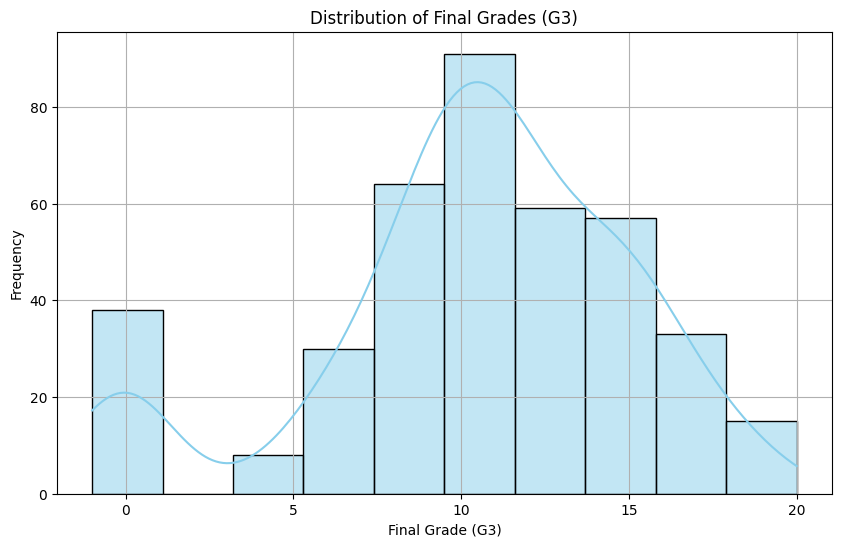

In [72]:

# Plot the distribution of final grades (G3)
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



- Insight: This plot shows the distribution of students' final grades. A normal distribution indicates a balanced performance.

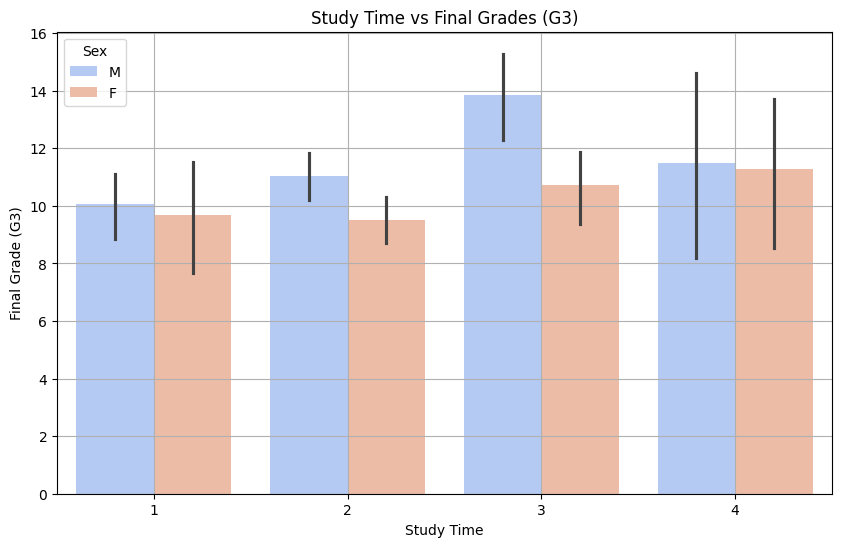

In [73]:
# Plot study time vs final grades (G3)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='studytime', y='G3', hue='sex', palette='coolwarm')
plt.title('Study Time vs Final Grades (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()



- Insight: This barplot identify if more study time correlates with higher final grades and if there are any differences between genders.
- male study hour is more than female

C:\Users\arora\AppData\Local\Temp\ipykernel_46696\1359025314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='famsize', y='G3', palette='pastel')


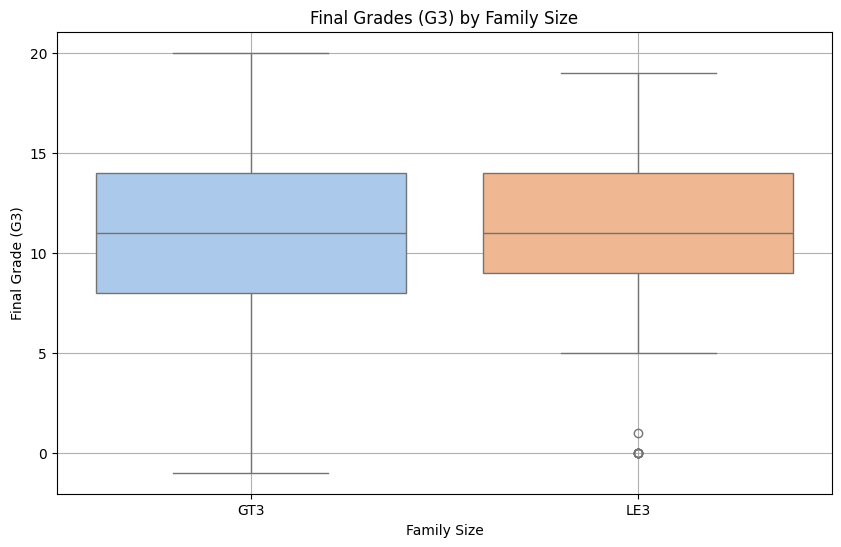

In [74]:
# Plot final grades (G3) by family size (famsize)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='famsize', y='G3', palette='pastel')
plt.title('Final Grades (G3) by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()



- Insight: This box plot shows how family size impacts final grades. Significant differences between family sizes might suggest social factors affecting academic performance.


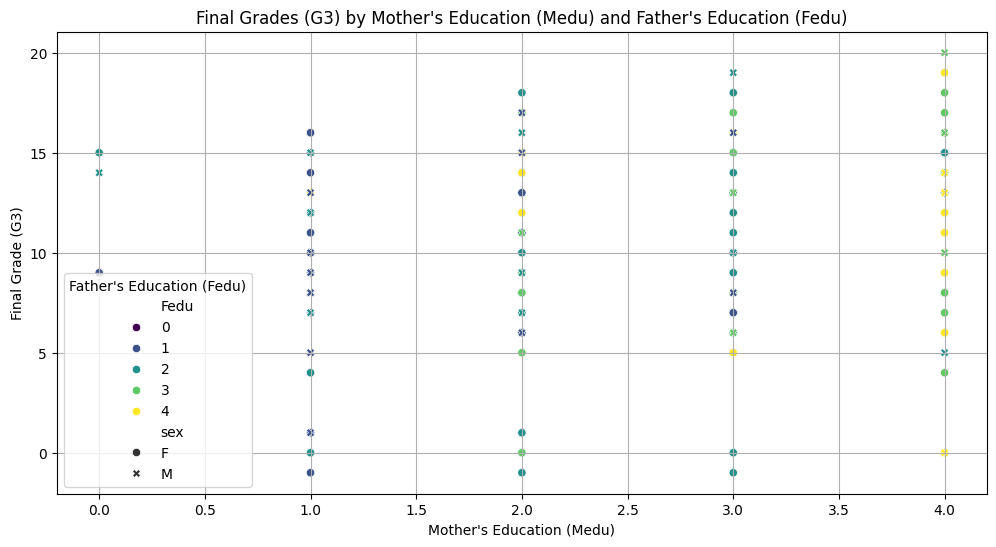

In [75]:
# Plot final grades (G3) by mother's education (Medu) and father's education (Fedu)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Medu', y='G3', hue='Fedu', palette='viridis', style='sex')
plt.title('Final Grades (G3) by Mother\'s Education (Medu) and Father\'s Education (Fedu)')
plt.xlabel('Mother\'s Education (Medu)')
plt.ylabel('Final Grade (G3)')
plt.legend(title='Father\'s Education (Fedu)')
plt.grid(True)
plt.show()



- Insight: This scatter plot explores how parental education levels relate to student performance. Differences might highlight the impact of parental involvement or support.


# model using NN


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [79]:
# Encode categorical features
label_encoders = {}
categorical_columns = df_clean.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Check the data types and ensure no missing values remain
print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 0 to 394
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      227 non-null    int32
 1   sex         227 non-null    int32
 2   age         227 non-null    int64
 3   address     227 non-null    int32
 4   famsize     227 non-null    int32
 5   Pstatus     227 non-null    int32
 6   Medu        227 non-null    int64
 7   Fedu        227 non-null    int64
 8   Mjob        227 non-null    int32
 9   Fjob        227 non-null    int32
 10  reason      227 non-null    int32
 11  guardian    227 non-null    int32
 12  traveltime  227 non-null    int64
 13  studytime   227 non-null    int64
 14  failures    227 non-null    int64
 15  schoolsup   227 non-null    int32
 16  famsup      227 non-null    int32
 17  paid        227 non-null    int32
 18  activities  227 non-null    int32
 19  nursery     227 non-null    int32
 20  higher      227 non-null    int32
 21

C:\Users\arora\AppData\Local\Temp\ipykernel_46696\3681618112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
C:\Users\arora\AppData\Local\Temp\ipykernel_46696\3681618112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
C:\Users\arora\AppData\Local\Temp\ipykernel_46696\3681618112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [80]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'name', 'email',
       'password', 'attendance'],
      dtype='object')

In [81]:
# Rename G1, G2, G3 to meaningful names
df_clean = df_clean.rename(columns={'G1': 'year1_marks', 'G2': 'year2_marks', 'G3': 'final_marks'})

# Define the features (columns to use for prediction)
X = df_clean[['age', 'year1_marks', 'year2_marks', 'studytime', 'failures']]

# Define the target (final year marks)
y = df_clean['final_marks']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of scaled data
print(f"X_train_scaled shape: {X_train_scaled.shape}, X_test_scaled shape: {X_test_scaled.shape}")


X_train_scaled shape: (181, 5), X_test_scaled shape: (46, 5)


# MLP

MLP - Mean Squared Error: 2.288575149650712
MLP - Root Mean Squared Error: 1.5128037379814714
MLP - R^2 Score: 0.7013122175623938


c:\Users\arora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


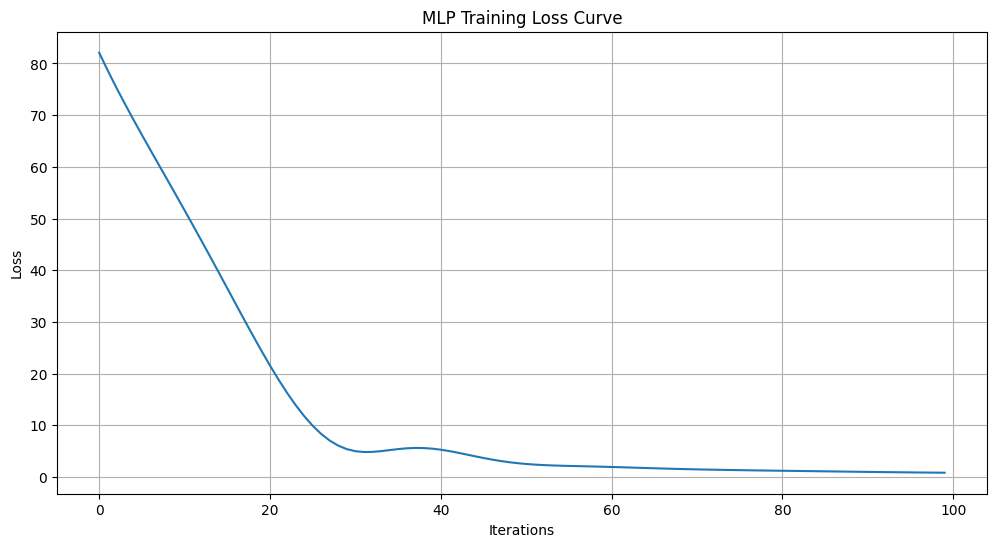

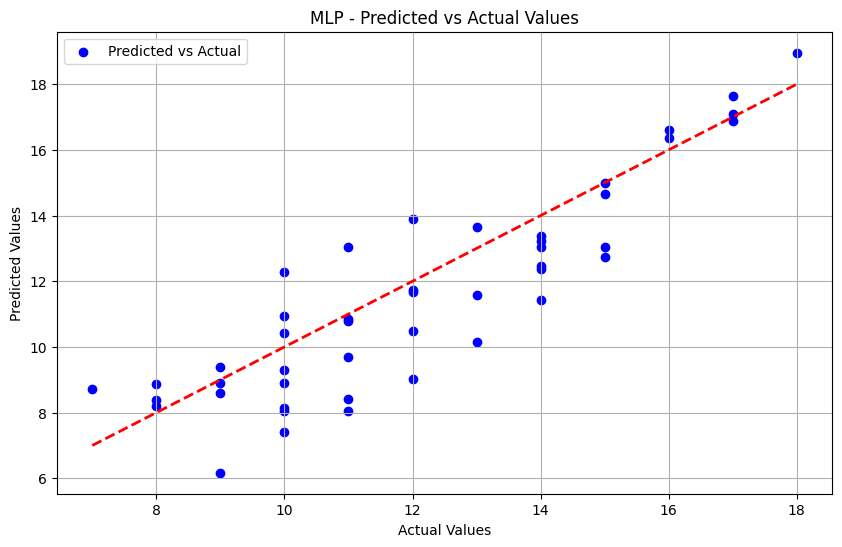

In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Build the MLP model using scikit-learn
mlp = MLPRegressor(hidden_layer_sizes=(100,),  # Number of neurons in each hidden layer
                   solver='adam',              # Adam optimizer for gradient descent
                   learning_rate_init=0.01,    # Initial learning rate
                   max_iter=100,              # Maximum number of training iterations
                   random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_mlp = mlp.predict(X_test_scaled)

# Calculate performance metrics
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP - Mean Squared Error: {mse_mlp}")
print(f"MLP - Root Mean Squared Error: {rmse_mlp}")
print(f"MLP - R^2 Score: {r2_mlp}")

# Plot loss curve during training (MLPRegressor has a loss_curve_ attribute)
plt.figure(figsize=(12, 6))
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Scatter plot of actual vs predicted values (MLP)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('MLP - Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()


# ANN

In [92]:
# Ensure reproducibility at the TensorFlow level
tf.keras.utils.set_random_seed(42)

# Define the model (Artificial Neural Network)
ann = tf.keras.models.Sequential([
    Dense(40, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(100, activation='relu'),  # Hidden layer with 100 units
    Dropout(0.2),
    Dense(60, activation='relu'),  # Another hidden layer
    Dropout(0.2),
    Dense(1)  # Output layer with 1 unit for regression
])

# Create Adam optimizer with a learning rate of 0.01
optimizer = Adam(learning_rate=0.01)

# Compile the model using Mean Squared Error as the loss function
ann.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history = ann.fit(X_train_scaled, y_train, batch_size=32, epochs=500, verbose=1, validation_split=0.2)

# Predict the target values for the test set
y_pred_ann = ann.predict(X_test_scaled)

# Calculate MSE, RMSE, MAE, and R-squared
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

# Print performance metrics
print(f"ANN - Mean Squared Error: {mse_ann}")
print(f"ANN - Root Mean Squared Error: {rmse_ann}")
print(f"ANN - Mean Absolute Error: {mae_ann}")
print(f"ANN - R-squared: {r2_ann}")

Epoch 1/500


c:\Users\arora\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 111.6652 - mae: 9.9795 - val_loss: 18.5989 - val_mae: 3.6879
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 32.6829 - mae: 4.3910 - val_loss: 13.5938 - val_mae: 3.1099
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.6525 - mae: 3.4456 - val_loss: 19.7190 - val_mae: 3.8694
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.8338 - mae: 3.5764 - val_loss: 16.0565 - val_mae: 2.6810
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.6920 - mae: 3.0493 - val_loss: 10.2698 - val_mae: 2.2901
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.2623 - mae: 2.7868 - val_loss: 8.1602 - val_mae: 2.3264
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.1266 - mae: 2.4629 - val_loss: 9.3126 - val_mae: 2.3132
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7329 - mae: 2.2270 - val_loss: 6.2321 - val_mae: 1.7457
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.6208 - mae: 

In [90]:
"""import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import os

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Ensure reproducibility at the TensorFlow level
os.environ['PYTHONHASHSEED'] = '42'
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# Define the model
ann = tf.keras.models.Sequential([
    Dense(40, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(60, activation='relu'),
    Dropout(0.2),
    Dense(1)  # No activation for regression
])

# Create Adam optimizer with learning rate 0.01
optimizer = Adam(learning_rate=0.01)

# Compile the model with the custom optimizer
ann.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history = ann.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1, validation_split=0.2)

# Predict the target values for the test set
y_pred_ann = ann.predict(X_test)

# Calculate MSE, RMSE, MAE, and R-squared
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN - Mean Squared Error: {mse_ann}")
print(f"ANN - Root Mean Squared Error: {rmse_ann}")
print(f"ANN - Mean Absolute Error: {mae_ann}")
print(f"ANN - R-squared: {r2_ann}")
"""

Epoch 1/500


c:\Users\arora\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 59.2047 - mae: 6.3457 - val_loss: 21.3069 - val_mae: 4.2388
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30.0345 - mae: 4.5878 - val_loss: 6.3519 - val_mae: 2.0987
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6046 - mae: 2.6405 - val_loss: 1.1304 - val_mae: 0.8746
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3065 - mae: 2.6223 - val_loss: 10.4185 - val_mae: 2.8524
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.5201 - mae: 2.5332 - val_loss: 0.7351 - val_mae: 0.7301
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.1919 - mae: 2.7435 - val_loss: 7.2813 - val_mae: 2.4170
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6389 - mae: 2.3284 - val_loss: 2.8633 - val_mae: 1.4875
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.0686 - mae: 2.0978 - val_loss: 9.5031 - val_mae: 2.9076
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2556 - mae: 1.96

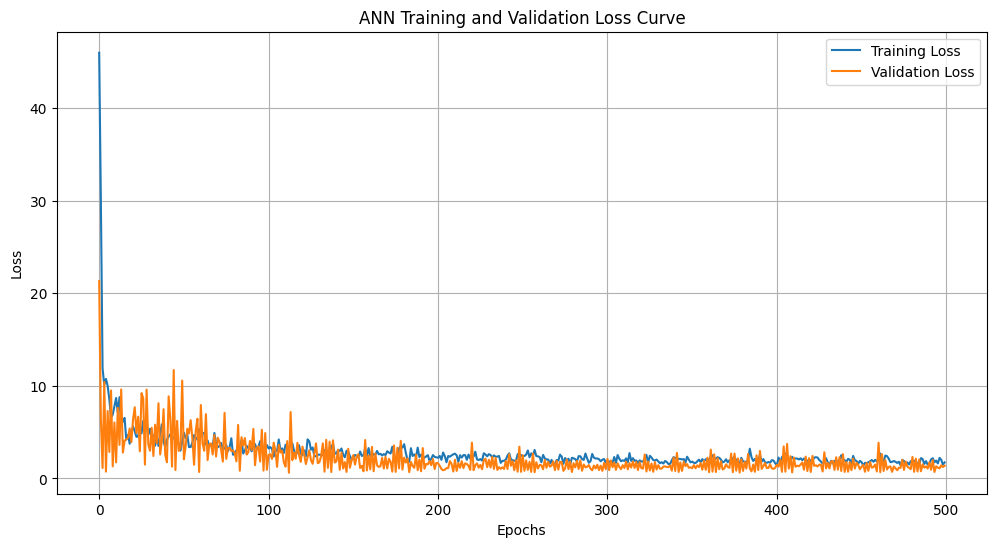

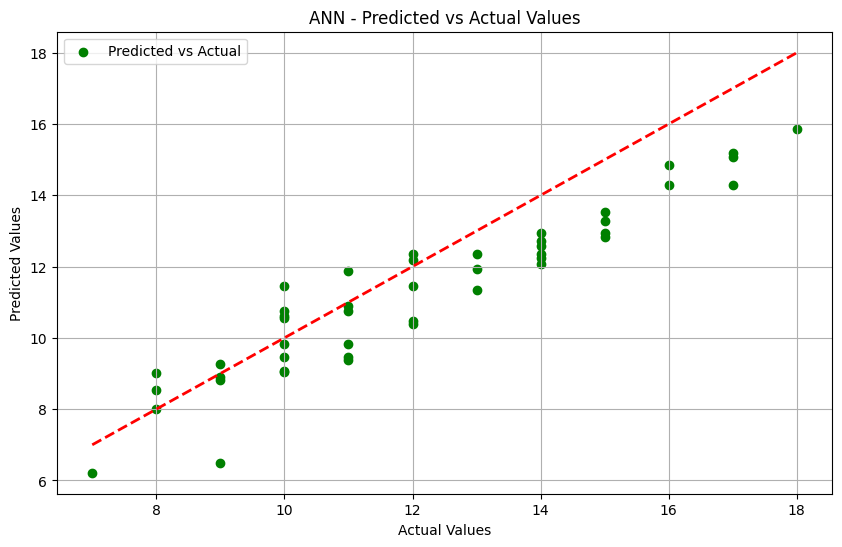

In [91]:
# Plot loss curve during training
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training and Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of actual vs predicted values (ANN)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('ANN - Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()


Comments and Explanation of Parameters:
Hidden Layer Size (MLP): Determines the number of neurons in each hidden layer. Larger values can increase model capacity but may lead to overfitting if the dataset is small.

Increasing neurons → Higher complexity, potentially better accuracy (but can overfit).
Decreasing neurons → Simpler model, lower risk of overfitting but might underperform.
Dropout (ANN): Randomly drops neurons during training to prevent overfitting.

Increasing dropout → Forces the network to be less dependent on individual neurons, reducing overfitting.
Decreasing dropout → Can lead to overfitting, as the model becomes too reliant on specific neurons.
Learning Rate: Controls how fast the model updates weights during optimization.

Higher learning rate → Faster convergence, but may overshoot the optimal point.
Lower learning rate → More precise but slower training.
Batch Size: Determines how many samples the model processes before updating weights.

Smaller batch size → Noisier updates but potentially more generalization.
Larger batch size → More stable updates but could get stuck in local minima.
Max Iterations (MLP): Limits the number of optimization steps for MLP.

More iterations → More chances for the model to learn, but may overfit after a certain point.
Fewer iterations → Prevents overfitting but may lead to underfitting.
Epochs (ANN): Controls how many passes the model makes through the entire dataset.

More epochs → Longer training, potentially better performance but higher risk of overfitting.
Fewer epochs → May stop training prematurely, resulting in underfitting.
Additional Graphs and Data:
You could also compare the loss (training/validation) curves, which show how well each model is learning over time. Including scatter plots of actual vs. predicted values helps to visualize how well the models predict on unseen data. The lower the spread around the identity line (y=x), the better the model's performance.

By using different visualizations and analyzing metrics such as MSE, RMSE, and R-squared, you can provide strong evidence of which model performs better and why. Based on your R-squared scores, ANN appears to perform better than MLP in your case, making it a stronger candidate for predictive tasks.

# Comparision

In [94]:
"""MLP - Mean Squared Error: 2.288575149650712
MLP - Root Mean Squared Error: 1.5128037379814714
MLP - R^2 Score: 0.7013122175623938
"""
# Scores for MLP
mlp_mse = 2.2885
mlp_rmse = 1.5128
mlp_r2 = 0.7013

"""
ANN - Mean Squared Error: 1.0139725169793248
ANN - Root Mean Squared Error: 1.0069620236033356
ANN - Mean Absolute Error: 0.8039977654166843
ANN - R-squared: 0.867663859499892

"""
# Scores for ANN
ann_mse = 1.0139
ann_rmse = 1.0069
ann_mae = 0.8039
ann_r2 = 0.8676



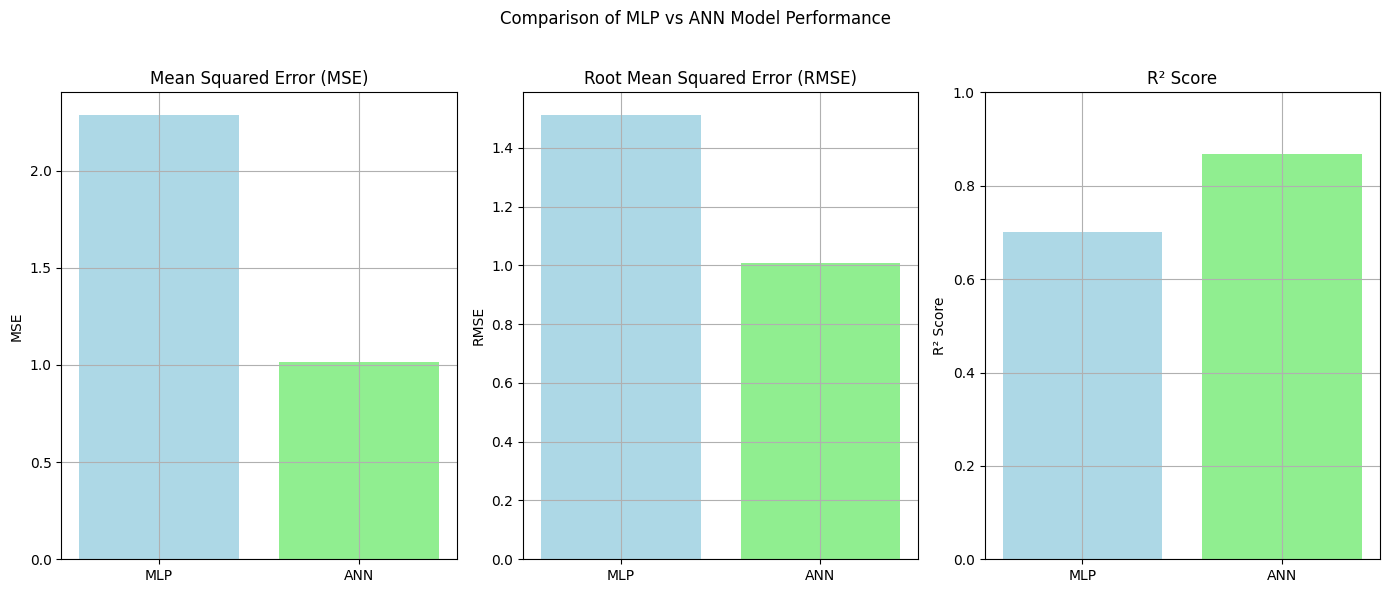

In [95]:
# Create subplots
plt.figure(figsize=(14, 6))

# MSE comparison
plt.subplot(1, 3, 1)
plt.bar(['MLP', 'ANN'], [mlp_mse, ann_mse], color=['lightblue', 'lightgreen'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.grid(True)

# RMSE comparison

plt.subplot(1, 3, 2)
plt.bar(['MLP', 'ANN'], [mlp_rmse, ann_rmse], color=['lightblue', 'lightgreen'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.grid(True)

# R² comparison
plt.subplot(1, 3, 3)
plt.bar(['MLP', 'ANN'], [mlp_r2, ann_r2], color=['lightblue', 'lightgreen'])
plt.title('R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(True)

# Show the plot
plt.suptitle('Comparison of MLP vs ANN Model Performance')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


- Best Model: The Artificial Neural Network (ANN) clearly outperforms the Multi-Layer Perceptron (MLP) model in all metrics: MSE, RMSE, and R² score.

- Reason: The ANN shows a lower MSE and RMSE, meaning its predictions are closer to the actual values, and a higher R² score indicates that it better captures the underlying relationships in the data. The inclusion of multiple hidden layers and dropout regularization in the ANN might be contributing to its superior performance, as it can model more complex patterns compared to MLP.

# testing

In [96]:
# Define a function to test predictions
def test_predictions(model, X_test, y_test):
    """
    This function takes the trained model, test data (X_test), and true target values (y_test),
    then predicts the target values and shows a comparison between the actual and predicted values.

    Args:
        model: Trained model used for prediction.
        X_test: Test data features.
        y_test: Actual target values (true final year marks).

    Returns:
        A DataFrame showing the actual vs predicted values and error metrics.
    """
    # Predict the target values for the test set
    y_pred = model.predict(X_test)
    
    # Flatten y_pred to match dimensions with y_test
    y_pred = y_pred.flatten()

    # Create a DataFrame to compare actual and predicted values
    results_df = pd.DataFrame({
        'Actual Marks': y_test,
        'Predicted Marks': y_pred
    })

    # Calculate the error metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Show the first 10 predictions vs actual values
    print("\nComparison of Actual vs Predicted Values:")
    print(results_df.head(10))

    return results_df

# Call the function to test predictions
results = test_predictions(ann, X_test_scaled, y_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error: 1.0139725169793248
Root Mean Squared Error: 1.0069620236033356
Mean Absolute Error: 0.8039977654166843
R-squared: 0.867663859499892

Comparison of Actual vs Predicted Values:
     Actual Marks  Predicted Marks
11             13        12.618332
241            11         9.499202
17             10         9.788215
208             9         8.766021
261             8         8.435254
116            14        12.653849
212            14        12.879122
163             9         9.243729
62             10        10.128393
32             16        15.687671


In [97]:
def predict_new_input(model, scaler, age, year1_marks, year2_marks, studytime, failures):
    """
    Function to take new input data and predict final marks using the trained model.
    
    Args:
        model: Trained Keras model used for prediction.
        scaler: Fitted StandardScaler used for scaling input data.
        age: Age of the student.
        year1_marks: Marks in year 1 (G1).
        year2_marks: Marks in year 2 (G2).
        studytime: Time spent studying.
        failures: Number of failures.
    
    Returns:
        Predicted final marks.
    """
    # Create a DataFrame for the new input (to match the structure of the original input)
    new_input = pd.DataFrame({
        'age': [age],
        'year1_marks': [year1_marks],
        'year2_marks': [year2_marks],
        'studytime': [studytime],
        'failures': [failures]
    })

    # Scale the new input data using the fitted scaler
    new_input_scaled = scaler.transform(new_input)

    # Predict final marks using the trained model
    predicted_marks = model.predict(new_input_scaled)
    
    # Return the predicted final marks
    return predicted_marks[0][0]  # Since it's a single prediction, return just the value


In [104]:
# Example: Predict for a student with the following details:
age = 18
year1_marks = 100
year2_marks = 100
studytime = 100
failures = 0

# Call the prediction function with trained model and input data
predicted_final_marks = predict_new_input(ann, scaler, age, year1_marks, year2_marks, studytime, failures)

# Print the predicted final marks
print(f"Predicted final marks: {predicted_final_marks:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted final marks: 161.92


# export the model

In [100]:
# Save the trained model to an HDF5 file (this saves the architecture, weights, and optimizer state)
ann.save("final_marks_predictor_model.h5")

# Save the scaler as well (using pickle since it is necessary for preprocessing)
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
